In [1]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import SGDRegressor
import pandas as pd

# Create mock housing dataset
np.random.seed(42)  # for reproducibility

n_samples = 100

# Generate area first (1000-5000 sq ft)
area = np.random.uniform(1, 10, n_samples)

# Generate bedrooms based on area (larger homes have more bedrooms)
bedrooms = np.clip(area  + np.random.normal(0,
                   0.5, n_samples), 1, 5).astype(int)

# Generate age (0-50 years)
age = np.random.uniform(0, 50, n_samples)

# Create price (in hundred thousands)
# e.g., 2.5 = $250,000
base_price = (
    # $200 per sq ft ($2 in hundred thousands)
    2 * area +
    # -$1000 per year (-0.01 in hundred thousands)
    -0.01 * age +
    # $50k per bedroom (0.5 in hundred thousands)
    0.5 * bedrooms +
    np.random.normal(0, 0.5, n_samples)  # random noise
)

# Ensure all prices are positive and reasonable (minimum $100k = 1.0)
prices = np.maximum(base_price, 1.0)

# Create a DataFrame
house_data = pd.DataFrame({
    'price': prices,
    'age': age,
    'area': area,
    'bedrooms': bedrooms
})

# Create a DataFrame
house_data = pd.DataFrame({
    'age': age,
    'area': area,
    'bedrooms': bedrooms,
    'price': prices,
})
print('The number of samples: ', house_data.shape[0])
house_data.head()

The number of samples:  100


,age,area,bedrooms,price
0,39.740565,4.370861,4,10.977772
1,25.131855,9.556429,5,21.007704
2,28.845194,7.587945,5,17.609349
3,24.625885,6.387926,5,15.416911
4,9.762149,2.404168,2,5.247249


In [2]:
def create_dataset(features):
    """
    return X and y for the given features from the house_data
    """
    X = house_data[features]
    y = house_data['price']
    return X, y


def create_animation(X, y):
    # Initialize SGDRegressor
    model = SGDRegressor(learning_rate='constant', eta0=0.0005)

    # Reshape X if it's a DataFrame
    X_array = X.values.reshape(-1, 1) if hasattr(X,
                                                 'values') else X.reshape(-1, 1)

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(X_array, y, color='blue', alpha=0.5, label='Data Points')
    line, = ax.plot([], [], 'r-', label='Prediction')
    ax.set_xlabel('Area (1000sq ft)')
    ax.set_ylabel('Price ($100k)')
    ax.set_title('Linear Regression Learning Process')
    ax.legend()
    ax.set_xlim(X_array.min(), X_array.max())

    def init():
        line.set_data([], [])
        return (line,)

    def update(frame):
        if frame == 0:
            # use a random initial model
            y_random = np.random.uniform(0, y.max(), n_samples)
            model.partial_fit(X_array, y_random)

        else:
            # use the model to predict
            model.partial_fit(X_array, y)
        y_pred = model.predict(X_array)    
        w1 = model.coef_[0].item()
        w0 = model.intercept_.item()
        loss = float(np.mean((y - y_pred) ** 2))
        line.set_data(X_array, y_pred)
        ax.set_title(f'Linear Regression Learning Process\n' +
                     f'w1={w1:.2f}, w0={w0:.2f}, loss={loss:.2f}, iteration={frame}')
        return (line,)

    # Create animation
    anim = FuncAnimation(fig, update, frames=21, init_func=init,
                         interval=100, blit=True)

    plt.close()
    return HTML(anim.to_jshtml())
X, y = create_dataset(['area'])
create_animation(X, y)

In [4]:
# Get training data
X, y = create_dataset(['area'])

In [5]:
X.head()

,area
0,4.370861
1,9.556429
2,7.587945
3,6.387926
4,2.404168


In [6]:
y.head()

0    10.977772
1    21.007704
2    17.609349
3    15.416911
4     5.247249
Name: price, dtype: float64

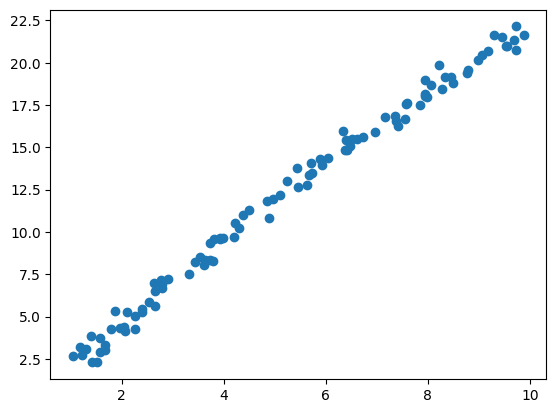

In [7]:
plt.scatter(X['area'], y)

In [8]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(X, y)


SGDRegressor()

In [9]:
print(f'model.coef_: {model.coef_}')
print(f'model.intercept_: {model.intercept_}')

model.coef_: [2.23020188]
model.intercept_: [0.37211466]


In [11]:
random_row = pd.DataFrame({'area': [9]})
model.predict(random_row)


array([20.44393159, 27.13453724])